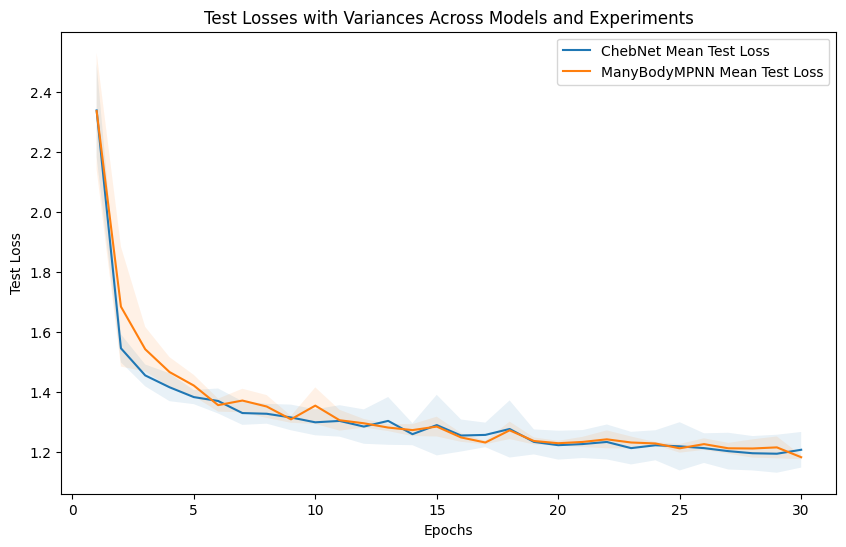

In [24]:
from datetime import datetime

# Read the provided log file to extract the necessary information for plotting
log_file_path = './logs/20240404-020524_training_nepo_30_nlayers_3_maxorder_4_cfilt_4_models_ChebNet_ManyBodyMPNN.log'

# Initialize containers for the extracted data
extracted_data = {
    'ChebNet': [],
    'ManyBodyMPNN': []
}

current_model = None

# Parse the log file
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        # Determine which model is currently being logged and detect new experiments
        if "Training ChebNet" in line:
            extracted_data['ChebNet'].append([])  # Start a new experiment list
            current_model = "ChebNet"
        elif "Training ManyBodyMPNN" in line:
            extracted_data['ManyBodyMPNN'].append([])  # Start a new experiment list
            current_model = "ManyBodyMPNN"
        # Extract test loss information
        elif "Average Test Loss" in line:
            # Find the numeric value for the test loss in the line
            parts = line.split()
            loss_value = float(parts[-1])
            # Append the loss to the last experiment's list for the current model
            extracted_data[current_model][-1].append(loss_value)

extracted_data['ManyBodyMPNN'].pop(-1)

# Convert lists to numpy arrays for easier mean and std deviation calculations
import numpy as np

for model in extracted_data:
    extracted_data[model] = np.array(extracted_data[model])

# Assuming the logging was done over a fixed number of epochs, for all experiments
n_epochs = len(extracted_data['ChebNet'][0])  # Assuming all models have the same number of epochs logged

# Proceed to plotting using the extracted data
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
epochs_range = range(1, n_epochs + 1)
for name, losses in extracted_data.items():
    mean_losses = np.mean(losses, axis=0)
    std_losses = np.std(losses, axis=0)
    plt.plot(epochs_range, mean_losses, label=f'{name} Mean Test Loss')
    plt.fill_between(epochs_range, mean_losses - std_losses, mean_losses + std_losses, alpha=0.1)

plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend()
plt.title('Test Losses with Variances Across Models and Experiments')
plt.savefig(f'./figures/actual_zinc_chebnet_mbmpnn_{datetime.now().strftime("%Y%m%d-%H%M%S")}.png')
plt.show()